# Basic stats about r/Overwatch

In [2]:
from psaw import PushshiftAPI
import pandas as pd

In [3]:
api = PushshiftAPI()

## Post and comment frequency

In [4]:
# All submissions to r/Overwatch per month since subreddit debut)
gen = api.search_submissions(subreddit = "Overwatch", aggs="created_utc", frequency="month")
data = next(gen)

In [5]:
posts = pd.DataFrame(data['created_utc'])
posts['key'] = pd.to_datetime(posts['key'].astype(int), unit='s')
posts = posts.rename(columns = {
    'doc_count': 'n_posts'
})
 

In [11]:
# All comments to r/Overwatch per month since subreddit debut)
gen = api.search_comments(subreddit = "Overwatch", aggs="created_utc", frequency="month")
data = next(gen)
data

{'created_utc': [{'doc_count': 3, 'key': 1385856000},
  {'doc_count': 0, 'key': 1388534400},
  {'doc_count': 0, 'key': 1391212800},
  {'doc_count': 0, 'key': 1393632000},
  {'doc_count': 0, 'key': 1396310400},
  {'doc_count': 0, 'key': 1398902400},
  {'doc_count': 0, 'key': 1401580800},
  {'doc_count': 0, 'key': 1404172800},
  {'doc_count': 0, 'key': 1406851200},
  {'doc_count': 0, 'key': 1409529600},
  {'doc_count': 0, 'key': 1412121600},
  {'doc_count': 15150, 'key': 1414800000},
  {'doc_count': 3000, 'key': 1417392000},
  {'doc_count': 3390, 'key': 1420070400},
  {'doc_count': 2314, 'key': 1422748800},
  {'doc_count': 10060, 'key': 1425168000},
  {'doc_count': 3438, 'key': 1427846400},
  {'doc_count': 6766, 'key': 1430438400},
  {'doc_count': 9391, 'key': 1433116800},
  {'doc_count': 10528, 'key': 1435708800},
  {'doc_count': 20742, 'key': 1438387200},
  {'doc_count': 26328, 'key': 1441065600},
  {'doc_count': 109567, 'key': 1443657600},
  {'doc_count': 198179, 'key': 1446336000},
 

In [12]:
comments = pd.DataFrame(data['created_utc'])
comments['key'] = pd.to_datetime(comments['key'].astype(int), unit='s')
comments = comments.rename(columns = {
    'doc_count': 'n_comments'
})

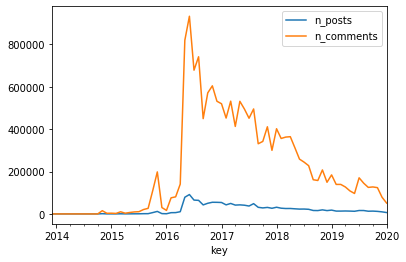

In [13]:
counts = pd.merge(posts, comments)
plot = counts.set_index('key').plot()
plot

In [14]:
total_posts = posts["n_posts"].sum()
total_comments = comments["n_comments"].sum()

print(f"posts: {total_posts}, comments: {total_comments}")

# estimated_size = total/1000*3.64
# num_of_files = total/1000

posts: 1462251, comments: 16181265
